# Stage 3 - Machine Learning

## Pre-processing Data

In [1]:
#Load data
import pandas as pd
df = pd.read_csv('Train.csv')

#Drop column ID (run 1x)
#ID adalah identifier, jadi tidak digunakan dalam preprocessing & modelling 
df = df.drop(columns = ['ID'])

#Rename variabel target
#karena tanda titik ambigu, sehingga dilakukan rename variabel target 
df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'},inplace=True)

#Label Encoding Reached on time
#Pada raw data, nilai 0 dianggap tepat waktu, nilai 1 tidak tepat waktu
#Untuk mempermudah, buat nilai 0 (tidak tepat waktu) menjadi 1(tepat waktu), dan sebaliknya
mapping_PI = {
    0: 1,
    1 : 0
}

df['Reached_on_time'] = df['Reached_on_time'].map(mapping_PI)

#Handle missing values
print('\nMissing Values')
print(df.isna().sum())

#Handle duplicated data
print('\nDuplicated Data: ',df.duplicated().sum())



Missing Values
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

Duplicated Data:  0


In [2]:
#Label Encoding
#Mengubah tipe data string menjadi label numerik
#Product_importance & Gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df['Gender'] = df['Gender'].map(mapping_Gender)
df['Product_importance'] = df['Product_importance'].map(mapping_Product_importance)

# One hot encoder Warehouse_block dan Mode_of_Shipment
# Karena tidak bersifat order/urutan, maka menggunakan one hot encoder
# Run 1x
for cats in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cats], prefix=cats)
    df = df.join(onehots)

# drop kolom yang sudah di-encoding
df = df.drop(columns=['Warehouse_block', 'Mode_of_Shipment'])

df.sample(5, random_state=42)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
107,4,5,216,3,2,1,26,2053,0,0,0,0,0,1,0,0,1
5594,3,1,220,3,0,0,6,5572,0,1,0,0,0,0,0,1,0
6997,3,2,215,4,0,0,3,4042,1,0,0,0,0,1,1,0,0
3984,5,1,160,5,0,0,1,4672,1,0,0,0,1,0,1,0,0
3111,5,4,229,2,1,0,44,2419,0,0,1,0,0,0,0,0,1


In [3]:
#Pengkategorian variabel untuk dilakukan normalisasi dan standarisasi
#variabel df1 untuk pengolahan data pertama
nums = ['Customer_care_calls','Cost_of_the_Product',
        'Prior_purchases','Discount_offered','Weight_in_gms']

cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

df1 = df
#Run 1 x
#Log Transformation variabel numerik
#Normalisasi data agar distribusi data mendekati distribusi normal
import numpy as np
features = nums
for var in features:
    df1[var] = (df1[var]+1).apply(np.log)

#Standarisasi data numerik dengan Standard Scaler
#Karena sebelumnya distribusi data tidak normal, maka dilakukan standarisasi
from sklearn.preprocessing import StandardScaler
for var in features:
    df1[var]= StandardScaler().fit_transform(df1[var].values.reshape(len(df1), 1))

df1.sample(5, random_state=42)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
107,0.065000,5,0.227372,-0.291495,2,1,1.188791,-0.784291,0,0,0,0,0,1,0,0,1
5594,-0.914646,1,0.302552,-0.291495,0,0,-0.260006,1.008358,0,1,0,0,0,0,0,1,0
6997,-0.914646,2,0.208360,0.463898,0,0,-0.860609,0.431944,1,0,0,0,0,1,1,0,0
3984,0.865429,1,-1.001227,1.081099,0,0,-1.604522,0.692028,1,0,0,0,1,0,1,0,0
3111,0.865429,4,0.466849,-1.265365,1,0,1.737029,-0.489789,0,0,1,0,0,0,0,0,1


In [4]:
# Handle class imbalance
df['Reached_on_time'].value_counts()

0    6563
1    4436
Name: Reached_on_time, dtype: int64

In [11]:
#Persentase balanced-imbalanced data
print(4436/10999)

0.40330939176288755


Karena persentase nilai minoritas terhadap keseluruhan sebesar 0.4, maka imbalanced data termasuk kategori mild. Artinya data masih dapat dikatakan sebagai data balanced.

## 1. Modelling

In [12]:
#Semua fitur
x = df1.drop(['Reached_on_time'], axis = 1) # Variabel independen
y = df1['Reached_on_time'] # Variabel dependen
    
#Train test split data
#Untuk menghindari data leak, maka dilakukan train test split data terlebih dahulu 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print('Data Training : ', x_train.shape)
print('Training label : ', y_train.shape)
print('Data Testing : ', x_test.shape)
print('Testing label : ', y_test.shape)

#Function evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    y_pred_train = model.predict(xtrain)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, y_pred_train))
    
    y_pred_proba = model.predict_proba(xtest)
    y_pred_proba_train = model.predict_proba(xtrain)
    print("AUC (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

Data Training :  (7699, 16)
Training label :  (7699,)
Data Testing :  (3300, 16)
Testing label :  (3300,)


In [6]:
#Install XG Boost
!pip install xgboost

In [15]:
#Model Klasifikasi

#Log Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
print('\nEvaluasi Log Regression')
eval_classification(lr, x_train, y_train, x_test, y_test)

#NBC
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print('\nEvaluasi NBC')
eval_classification(nb, x_train, y_train, x_test, y_test)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
print('\nEvaluasi Random Forest')
eval_classification(rf, x_train, y_train, x_test, y_test)

#XG Boost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)
print('\nEvaluasi XG Boost')
eval_classification(xg, x_train, y_train, x_test, y_test)

#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
print('\nEvaluasi Ada Boost')
eval_classification(ab, x_train, y_train, x_test, y_test)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('\nEvaluasi KNN') 
eval_classification(knn, x_train, y_train, x_test, y_test)


Evaluasi Log Regression
Accuracy (Test Set): 0.63
Accuracy (Train Set): 0.63
Precision (Test Set): 0.53
Precision (Train Set): 0.55
Recall (Test Set): 0.46
Recall (Train Set): 0.48
F1-Score (Test Set): 0.49
F1-Score (Train Set): 0.51
AUC (test-proba): 0.71
AUC (train-proba): 0.72

Evaluasi NBC
Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.65
Precision (Test Set): 0.54
Precision (Train Set): 0.55
Recall (Test Set): 0.71
Recall (Train Set): 0.72
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.62
AUC (test-proba): 0.71
AUC (train-proba): 0.72

Evaluasi Random Forest
Accuracy (Test Set): 0.66
Accuracy (Train Set): 1.00
Precision (Test Set): 0.56
Precision (Train Set): 1.00
Recall (Test Set): 0.68
Recall (Train Set): 1.00
F1-Score (Test Set): 0.62
F1-Score (Train Set): 1.00
AUC (test-proba): 0.74
AUC (train-proba): 1.00

Evaluasi XG Boost
Accuracy (Test Set): 0.66
Accuracy (Train Set): 0.93
Precision (Test Set): 0.56
Precision (Train Set): 0.88
Recall (Test Set): 0.67
Recall (Train S

Dari percobaan di atas, model terbaik yaitu Ada Boost. Karena memiliki nilai akurasi yang tidak jauh antara test-train yaitu sebesar 0.68 (tidak overfit/underfit) dan memiliki nilai Precision sebesar 0.57 (semakin tinggi nilai Precision, semakin rendah jumlah False Positive)

In [29]:
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(model):
    y_pred = model.predict(x_test)
    y_pred
    b = confusion_matrix(y_test, y_pred)
    print ('Hasil confusion matrix :\n', b) #hitung confussion matrix
    TN = b[0,0]
    FN = b[1,0]
    TP = b[1,1]
    FP = b[0,1]

ConfusionMatrix(ab)

Hasil confusion matrix :
 [[1213  775]
 [ 295 1017]]


Berdasarkan hasil convusion matrix, didapatkan model AdaBoost memiliki nilai FN terkecil dan nilai TN terbesar.

In [30]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='accuracy')
ab_tuned.fit(x_train,y_train)

# Evaluation
eval_classification(ab_tuned, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.68
Precision (Test Set): 0.57
Precision (Train Set): 0.58
Recall (Test Set): 0.77
Recall (Train Set): 0.77
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.66
AUC (test-proba): 0.74
AUC (train-proba): 0.75


Dari percobaan dengan Hyperparameter RandomizedSearchCV, didapatkan hasil yaitu nilai Recall menurun menjadi sebesar 0.77 yang sebelumnya bernilai 0.78 dan nilai akurasi yang bernilai sama dengan sebelumnya. Sehingga selanjutnya tidak digunakan Hyperparameter RandomizedSearchCV.

## 2. Feature Importance

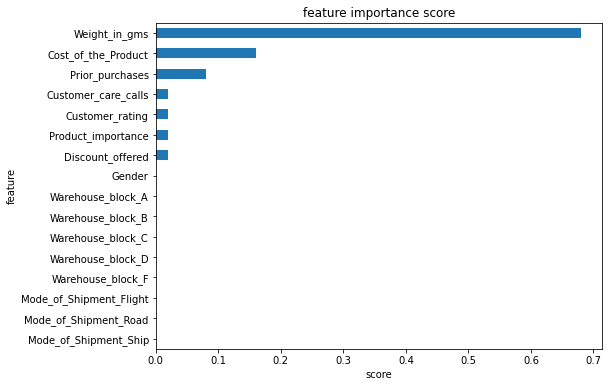

In [45]:
import matplotlib.pyplot as plt

#Function untuk feature importance
def show_feature_importance(model,x) :
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 6))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(ab,x)

Berdasarkan hasil Feature Importance, didapatkan feature paling penting yaitu pada kolom Weight_in_gms. Sedangkan kolom Gender dan kolom hasil One Hot Encoder tidak memiliki skor, sehingga kita bisa menghapus fitur-fitur tersebut. Namun dikarenakan jumlah kolom yang tidak banyak, sehingga tidak ada kolom yang dihapus.

Kolom Weight_in_gms sangat berpengaruh dengan Reached_on_time. Artinya berat barang mempengaruhi ketepatan waktu pengiriman. Secara logika, semakin berat barang tersebut, maka membutuhkan waktu yang pengiriman yang lebih lama. Padaha

## 3. Git

In [ ]:
https://github.com/azinifp/Rakaship-Final-Project.git